# 10 Minutes to Pandas

[Online Reference](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro).

Creating a [Series](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,2.658749,-0.531421,0.078409,0.177078
2013-01-02,0.711405,1.220496,0.606016,0.356096
2013-01-03,0.301308,0.333894,1.502923,0.523031
2013-01-04,0.604597,-0.412919,-1.049834,0.292955
2013-01-05,-0.961464,0.434993,-0.381285,-0.650485
2013-01-06,0.133656,-0.580705,-1.080586,-0.477340


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [7]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics)

Here is how to view the top and bottom rows of the frame:

In [8]:
df.head()

,A,B,C,D
2013-01-01,2.658749,-0.531421,0.078409,0.177078
2013-01-02,0.711405,1.220496,0.606016,0.356096
2013-01-03,0.301308,0.333894,1.502923,0.523031
2013-01-04,0.604597,-0.412919,-1.049834,0.292955
2013-01-05,-0.961464,0.434993,-0.381285,-0.650485


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.604597,-0.412919,-1.049834,0.292955
2013-01-05,-0.961464,0.434993,-0.381285,-0.650485
2013-01-06,0.133656,-0.580705,-1.080586,-0.477340


describe() shows a quick statistic summary of your data:

In [10]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.574709,0.077390,-0.054060,0.036889
std,1.182532,0.713374,1.002980,0.481740
min,-0.961464,-0.580705,-1.080586,-0.650485
25%,0.175569,-0.501796,-0.882697,-0.313736
50%,0.452952,-0.039512,-0.151438,0.235017
75%,0.684703,0.409718,0.474114,0.340311
max,2.658749,1.220496,1.502923,0.523031


Sorting by an axis:

In [11]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.177078,0.078409,-0.531421,2.658749
2013-01-02,0.356096,0.606016,1.220496,0.711405
2013-01-03,0.523031,1.502923,0.333894,0.301308
2013-01-04,0.292955,-1.049834,-0.412919,0.604597
2013-01-05,-0.650485,-0.381285,0.434993,-0.961464
2013-01-06,-0.477340,-1.080586,-0.580705,0.133656


Sorting by values:

In [12]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.133656,-0.580705,-1.080586,-0.477340
2013-01-01,2.658749,-0.531421,0.078409,0.177078
2013-01-04,0.604597,-0.412919,-1.049834,0.292955
2013-01-03,0.301308,0.333894,1.502923,0.523031
2013-01-05,-0.961464,0.434993,-0.381285,-0.650485
2013-01-02,0.711405,1.220496,0.606016,0.356096


## Selection

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing.](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)

### Getting
Selecting a single column, which yields a Series, equivalent to `df.A`:

In [13]:
df['A']

2013-01-01    2.658749
2013-01-02    0.711405
2013-01-03    0.301308
2013-01-04    0.604597
2013-01-05   -0.961464
2013-01-06    0.133656
Freq: D, Name: A, dtype: float64

Selecting via `[ ]`, which slices the rows.

In [14]:
df[0:3]

,A,B,C,D
2013-01-01,2.658749,-0.531421,0.078409,0.177078
2013-01-02,0.711405,1.220496,0.606016,0.356096
2013-01-03,0.301308,0.333894,1.502923,0.523031


In [15]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.711405,1.220496,0.606016,0.356096
2013-01-03,0.301308,0.333894,1.502923,0.523031
2013-01-04,0.604597,-0.412919,-1.049834,0.292955


#### Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

For getting a cross section using a label:

In [16]:
df.loc[dates[0]]

A    2.658749
B   -0.531421
C    0.078409
D    0.177078
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [17]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,2.658749,-0.531421
2013-01-02,0.711405,1.220496
2013-01-03,0.301308,0.333894
2013-01-04,0.604597,-0.412919
2013-01-05,-0.961464,0.434993
2013-01-06,0.133656,-0.580705


Showing label slicing, both endpoints are included:

In [18]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.711405,1.220496
2013-01-03,0.301308,0.333894
2013-01-04,0.604597,-0.412919


Reduction in the dimensions of the returned object:

In [19]:
df.loc['20130102', ['A', 'B']]

A    0.711405
B    1.220496
Name: 2013-01-02 00:00:00, dtype: float64

#### Boolean Indexing 

Using a single column’s values to select data.

In [20]:
df[df.A > 0]

,A,B,C,D
2013-01-01,2.658749,-0.531421,0.078409,0.177078
2013-01-02,0.711405,1.220496,0.606016,0.356096
2013-01-03,0.301308,0.333894,1.502923,0.523031
2013-01-04,0.604597,-0.412919,-1.049834,0.292955
2013-01-06,0.133656,-0.580705,-1.080586,-0.477340


Selecting values from a DataFrame where a boolean condition is met.

In [21]:
df[df > 0]

,A,B,C,D
2013-01-01,2.658749,NaN,0.078409,0.177078
2013-01-02,0.711405,1.220496,0.606016,0.356096
2013-01-03,0.301308,0.333894,1.502923,0.523031
2013-01-04,0.604597,NaN,NaN,0.292955
2013-01-05,NaN,0.434993,NaN,NaN
2013-01-06,0.133656,NaN,NaN,NaN


## Setting

Setting a new column automatically aligns the data by the indexes.

In [22]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [23]:
df['F'] = s1

Setting values by label:

In [24]:
df.at[dates[0], 'A'] = 0

Setting by assigning with a NumPy array:

In [25]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [26]:
df

,A,B,C,D,F
2013-01-01,0.000000,-0.531421,0.078409,5,NaN
2013-01-02,0.711405,1.220496,0.606016,5,1.0
2013-01-03,0.301308,0.333894,1.502923,5,2.0
2013-01-04,0.604597,-0.412919,-1.049834,5,3.0
2013-01-05,-0.961464,0.434993,-0.381285,5,4.0
2013-01-06,0.133656,-0.580705,-1.080586,5,5.0


A where operation with setting.

In [27]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-0.531421,-0.078409,-5,NaN
2013-01-02,-0.711405,-1.220496,-0.606016,-5,-1.0
2013-01-03,-0.301308,-0.333894,-1.502923,-5,-2.0
2013-01-04,-0.604597,-0.412919,-1.049834,-5,-3.0
2013-01-05,-0.961464,-0.434993,-0.381285,-5,-4.0
2013-01-06,-0.133656,-0.580705,-1.080586,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [28]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,-0.531421,0.078409,5,NaN,NaN
2013-01-02,0.711405,1.220496,0.606016,5,1.0,NaN
2013-01-03,0.301308,0.333894,1.502923,5,2.0,NaN
2013-01-04,0.604597,-0.412919,-1.049834,5,3.0,NaN


To drop any rows that have missing data.

In [29]:
df1.dropna(how='any')

,A,B,C,D,F,E


Filling missing data.

In [30]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,-0.531421,0.078409,5,5.0,5.0
2013-01-02,0.711405,1.220496,0.606016,5,1.0,5.0
2013-01-03,0.301308,0.333894,1.502923,5,2.0,5.0
2013-01-04,0.604597,-0.412919,-1.049834,5,3.0,5.0


To get the boolean mask where values are nan.

In [31]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,True
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [32]:
df.mean()

A    0.131584
B    0.077390
C   -0.054060
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [33]:
df.mean(1)

2013-01-01    1.136747
2013-01-02    1.707583
2013-01-03    1.827625
2013-01-04    1.428369
2013-01-05    1.618449
2013-01-06    1.694473
Freq: D, dtype: float64

### Apply

Applying functions to the data

In [34]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,-0.531421,0.078409,5,NaN
2013-01-02,0.711405,0.689075,0.684425,10,1.0
2013-01-03,1.012713,1.022969,2.187348,15,3.0
2013-01-04,1.617310,0.610050,1.137514,20,6.0
2013-01-05,0.655846,1.045043,0.756229,25,10.0
2013-01-06,0.789502,0.464338,-0.324357,30,15.0


In [35]:
df.apply(lambda x: x.max() - x.min())

A    1.672869
B    1.801202
C    2.583509
D    0.000000
F    4.000000
dtype: float64

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [36]:
df = pd.DataFrame(np.random.randn(10, 4))

In [37]:
df

,0,1,2,3
0,-0.907409,-1.340287,-0.426090,0.302959
1,1.479468,-0.225098,1.840493,1.550793
2,-1.082262,-1.847308,-1.024895,1.146972
3,0.134497,-0.315296,0.412058,0.390169
4,0.931749,0.614378,0.030007,-0.874615
5,-0.567790,1.186460,-0.036341,-0.369458
6,0.721171,1.225912,0.455798,0.366826
7,-0.525126,-0.217354,-0.120716,-1.610721
8,1.274501,0.942567,0.633393,0.171712
9,-1.291660,0.166326,-0.688131,-0.605623


In [38]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [39]:
pd.concat(pieces)

,0,1,2,3
0,-0.907409,-1.340287,-0.426090,0.302959
1,1.479468,-0.225098,1.840493,1.550793
2,-1.082262,-1.847308,-1.024895,1.146972
3,0.134497,-0.315296,0.412058,0.390169
4,0.931749,0.614378,0.030007,-0.874615
5,-0.567790,1.186460,-0.036341,-0.369458
6,0.721171,1.225912,0.455798,0.366826
7,-0.525126,-0.217354,-0.120716,-1.610721
8,1.274501,0.942567,0.633393,0.171712
9,-1.291660,0.166326,-0.688131,-0.605623


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [40]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [41]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [42]:
left

,key,lval
0,foo,1
1,foo,2


In [43]:
right

,key,rval
0,foo,4
1,foo,5


In [44]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [45]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [46]:
df

,A,B,C,D
0,0.079590,-0.603650,-0.761224,0.024441
1,0.291354,0.724095,1.044523,0.541503
2,-0.558932,0.707419,-1.033791,0.728215
3,0.419128,-0.309578,0.966173,0.750549
4,-1.314829,0.314034,-0.237934,1.229659
5,1.177063,-1.059025,-1.614014,1.677773
6,-0.266867,-0.441787,-0.693981,0.444349
7,-0.274727,1.689858,0.418824,1.206990


In [47]:
s = df.loc[3]

In [48]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.079590,-0.603650,-0.761224,0.024441
1,0.291354,0.724095,1.044523,0.541503
2,-0.558932,0.707419,-1.033791,0.728215
3,0.419128,-0.309578,0.966173,0.750549
4,-1.314829,0.314034,-0.237934,1.229659
5,1.177063,-1.059025,-1.614014,1.677773
6,-0.266867,-0.441787,-0.693981,0.444349
7,-0.274727,1.689858,0.418824,1.206990
8,0.419128,-0.309578,0.966173,0.750549


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [49]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [50]:
df

,A,B,C,D
0,foo,one,-0.304144,-0.821162
1,bar,one,-0.243857,0.723860
2,foo,two,1.018757,-0.566629
3,bar,three,0.197411,-0.291707
4,foo,two,-2.100902,2.079839
5,bar,two,1.196737,0.148616
6,foo,one,0.565844,1.071848
7,foo,three,0.615686,1.177031


Grouping and then applying a function sum to the resulting groups.

In [51]:
df.groupby('A').sum()

,C,D
A,,
bar,1.150291,0.580769
foo,-0.204759,2.940927


In [52]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.243857  0.723860
    three  0.197411 -0.291707
    two    1.196737  0.148616
foo one    0.261699  0.250686
    three  0.615686  1.177031
    two   -1.082145  1.513210

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [53]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [54]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [55]:
ts.resample('5Min').sum()

2012-01-01    25041
Freq: 5T, dtype: int64

Time zone representation

In [56]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [57]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [58]:
ts

2012-03-06   -1.212699
2012-03-07    1.752959
2012-03-08    0.602267
2012-03-09    0.223653
2012-03-10    1.362525
Freq: D, dtype: float64

In [59]:
ts_utc = ts.tz_localize('UTC')

In [60]:
ts_utc

2012-03-06 00:00:00+00:00   -1.212699
2012-03-07 00:00:00+00:00    1.752959
2012-03-08 00:00:00+00:00    0.602267
2012-03-09 00:00:00+00:00    0.223653
2012-03-10 00:00:00+00:00    1.362525
Freq: D, dtype: float64


Convert to another time zone

In [61]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.212699
2012-03-06 19:00:00-05:00    1.752959
2012-03-07 19:00:00-05:00    0.602267
2012-03-08 19:00:00-05:00    0.223653
2012-03-09 19:00:00-05:00    1.362525
Freq: D, dtype: float64


Converting between time span representations

In [62]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [63]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [64]:
ts

2012-01-31    0.536273
2012-02-29   -1.619672
2012-03-31    0.684363
2012-04-30   -0.405562
2012-05-31    0.471471
Freq: M, dtype: float64

In [65]:
ps = ts.to_period()

In [66]:
ps

2012-01    0.536273
2012-02   -1.619672
2012-03    0.684363
2012-04   -0.405562
2012-05    0.471471
Freq: M, dtype: float64

In [67]:
ps.to_timestamp()

2012-01-01    0.536273
2012-02-01   -1.619672
2012-03-01    0.684363
2012-04-01   -0.405562
2012-05-01    0.471471
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [68]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [69]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [70]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [71]:
ts.head()

1990-03-01 09:00    0.030955
1990-06-01 09:00   -1.487035
1990-09-01 09:00   -1.526000
1990-12-01 09:00    0.002941
1991-03-01 09:00    0.013857
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [72]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [73]:
df["grade"] = df["raw_grade"].astype("category")

In [74]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [75]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [76]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [77]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [78]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [79]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [81]:
ts = ts.cumsum()

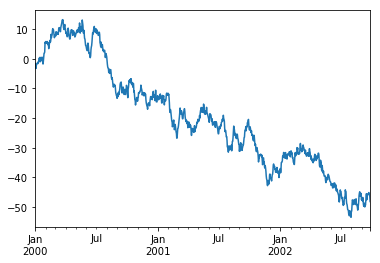

In [82]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [83]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [84]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

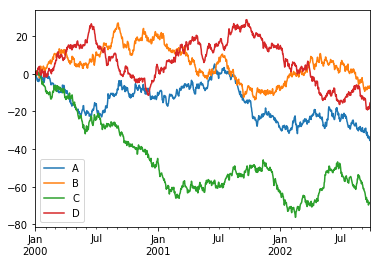

In [85]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [86]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [87]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.691258,-1.052916,0.804702,0.426119
1,2000-01-02,0.423200,-0.807138,-0.040124,1.042257
2,2000-01-03,-0.715812,-1.022270,-1.053398,0.257581
3,2000-01-04,-1.822478,0.586274,0.088133,-0.061228
4,2000-01-05,-1.939294,1.551488,1.126762,0.702347
5,2000-01-06,-3.265731,1.130255,0.928707,-0.431255
6,2000-01-07,-3.680254,1.229234,1.564374,-0.651826
7,2000-01-08,-4.035118,0.338865,0.734130,0.951791
8,2000-01-09,-2.903821,0.059225,0.127616,2.945585
9,2000-01-10,-3.324697,-0.502550,-0.752478,2.459286


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [88]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [89]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.691258,-1.052916,0.804702,0.426119
2000-01-02,0.423200,-0.807138,-0.040124,1.042257
2000-01-03,-0.715812,-1.022270,-1.053398,0.257581
2000-01-04,-1.822478,0.586274,0.088133,-0.061228
2000-01-05,-1.939294,1.551488,1.126762,0.702347
2000-01-06,-3.265731,1.130255,0.928707,-0.431255
2000-01-07,-3.680254,1.229234,1.564374,-0.651826
2000-01-08,-4.035118,0.338865,0.734130,0.951791
2000-01-09,-2.903821,0.059225,0.127616,2.945585
2000-01-10,-3.324697,-0.502550,-0.752478,2.459286


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [90]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])